# Exploring und Plotting 2

**Inhalt:** Selbständige Übung in Gruppen

**Nötige Skills:** Time Series

**Lernziele:**
- Selbständig Daten explorieren und Storyideen testen

# Das Beispiel

Börsenkurse aller Bluechips-Firmen an der Schweizer Börse.

Korpus: https://www.six-group.com/exchanges/shares/explorer/swiss_blue_chips/closings_de.html

Die Daten stammen von dieser Quelle: https://finance.yahoo.com/ und wurden zu einem File kompiliert.

Kompilierungsfile: `dataprojects/Boersenkurse/Börsenkurse kompilieren.ipnyb`

Kompilierte Daten: `dataprojects/Boersenkurse/smi_members.csv`

## Vorbereitung

Entscheiden Sie selbst, welche Libraries Sie brauchen!

In [1]:
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [2]:
df = pd.read_csv('dataprojects/Boersenkurse/smi_members.csv')

In [4]:
df.head(5)

,Unnamed: 0,ABB LTD,ADECCO,ALCON,AMS,CLARIANT,CS GROUP,GEBERIT,GIVAUDAN,JULIUS BAER,...,SIKA,SONOVA,SWATCH GROUP,SWISS LIFE HOLDING,SWISS RE,SWISSCOM,TEMENOS,UBS GROUP,VIFOR,ZURICH INSURANCE
0,2014-10-13,19.65,60.400002,NaN,NaN,15.54,23.689699,289.799988,1461.0,39.500000,...,51.849998,143.899994,436.100006,211.899994,73.650002,531.5,32.000000,15.30,74.449997,279.000000
1,2014-10-14,19.76,60.700001,NaN,NaN,15.58,23.689699,294.399994,1478.0,39.770000,...,52.716702,138.399994,435.299988,211.100006,73.050003,530.0,32.500000,15.33,75.000000,277.600006
2,2014-10-15,19.16,58.849998,NaN,NaN,15.16,22.817499,288.000000,1458.0,37.459999,...,51.799999,134.600006,429.500000,205.699997,72.050003,515.5,32.200001,14.73,73.900002,270.399994
3,2014-10-16,19.26,59.500000,NaN,NaN,15.06,22.292299,288.000000,1466.0,37.509998,...,51.783298,133.699997,431.500000,200.500000,71.050003,507.5,31.650000,14.50,72.849998,265.899994
4,2014-10-17,19.40,60.950001,NaN,NaN,15.38,22.751900,297.200012,1494.0,39.119999,...,53.333302,138.399994,438.500000,208.500000,71.699997,515.5,32.500000,15.05,75.849998,271.899994


In [7]:
df.dtypes

Unnamed: 0             object
ABB LTD               float64
ADECCO                float64
ALCON                 float64
AMS                   float64
CLARIANT              float64
CS GROUP              float64
GEBERIT               float64
GIVAUDAN              float64
JULIUS BAER           float64
KUEHNE+NAGEL INT      float64
LAFARGEHOLCIM         float64
LOGITECH              float64
LONZA                 float64
NESTLE                float64
NOVARTIS              float64
PARTNERS GROUP        float64
RICHEMONT             float64
ROCHE                 float64
SCHINDLER             float64
SGS                   float64
SIKA                  float64
SONOVA                float64
SWATCH GROUP          float64
SWISS LIFE HOLDING    float64
SWISS RE              float64
SWISSCOM              float64
TEMENOS               float64
UBS GROUP             float64
VIFOR                 float64
ZURICH INSURANCE      float64
dtype: object

In [11]:
df = pd.read_csv('dataprojects/Boersenkurse/smi_members.csv', index_col = 0)

## Datenfile laden

Wie ist die Datei strukturiert? Was müssen wir beim Laden beachten?

Tipp: `index_col=0` verwenden.

In [12]:
df.index = pd.to_datetime(df.index)

In [13]:
df.head(5)

,ABB LTD,ADECCO,ALCON,AMS,CLARIANT,CS GROUP,GEBERIT,GIVAUDAN,JULIUS BAER,KUEHNE+NAGEL INT,...,SIKA,SONOVA,SWATCH GROUP,SWISS LIFE HOLDING,SWISS RE,SWISSCOM,TEMENOS,UBS GROUP,VIFOR,ZURICH INSURANCE
2014-10-13,19.65,60.400002,NaN,NaN,15.54,23.689699,289.799988,1461.0,39.500000,117.300003,...,51.849998,143.899994,436.100006,211.899994,73.650002,531.5,32.000000,15.30,74.449997,279.000000
2014-10-14,19.76,60.700001,NaN,NaN,15.58,23.689699,294.399994,1478.0,39.770000,118.400002,...,52.716702,138.399994,435.299988,211.100006,73.050003,530.0,32.500000,15.33,75.000000,277.600006
2014-10-15,19.16,58.849998,NaN,NaN,15.16,22.817499,288.000000,1458.0,37.459999,115.900002,...,51.799999,134.600006,429.500000,205.699997,72.050003,515.5,32.200001,14.73,73.900002,270.399994
2014-10-16,19.26,59.500000,NaN,NaN,15.06,22.292299,288.000000,1466.0,37.509998,117.099998,...,51.783298,133.699997,431.500000,200.500000,71.050003,507.5,31.650000,14.50,72.849998,265.899994
2014-10-17,19.40,60.950001,NaN,NaN,15.38,22.751900,297.200012,1494.0,39.119999,117.500000,...,53.333302,138.399994,438.500000,208.500000,71.699997,515.5,32.500000,15.05,75.849998,271.899994


## Daten checken

**Länge, Spalten, Integrität**

In [17]:
df.describe()

,ABB LTD,ADECCO,ALCON,AMS,CLARIANT,CS GROUP,GEBERIT,GIVAUDAN,JULIUS BAER,KUEHNE+NAGEL INT,...,SIKA,SONOVA,SWATCH GROUP,SWISS LIFE HOLDING,SWISS RE,SWISSCOM,TEMENOS,UBS GROUP,VIFOR,ZURICH INSURANCE
count,1255.000000,1255.000000,123.000000,129.000000,1249.000000,1255.000000,1255.000000,1255.000000,1254.000000,1255.000000,...,1255.000000,1255.000000,1255.000000,1255.000000,1254.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000
mean,21.029092,64.617442,58.891789,40.850465,19.915544,16.162706,397.884064,2061.216733,47.705901,143.070916,...,98.037445,154.489363,357.614741,314.009562,90.266699,487.712112,90.790956,15.802676,125.032271,288.744462
std,2.308043,9.452812,1.500104,5.785656,3.108334,4.413966,50.144684,318.137371,6.976255,13.918130,...,35.639866,30.207915,61.718257,79.947396,5.592158,35.893635,47.821762,2.572662,25.497484,34.860818
min,16.040001,43.560001,55.080002,31.639999,13.810000,9.567180,288.000000,1458.000000,33.799999,115.900002,...,45.333302,111.400002,248.100006,200.500000,71.050003,428.600006,26.700001,9.940000,71.599998,196.000000
25%,19.212499,56.765000,58.000000,35.360001,17.360001,12.736900,356.899994,1810.000000,41.942499,133.699997,...,60.483351,130.800003,301.100006,239.699997,86.720001,459.799988,48.125000,13.770000,107.099998,266.550003
50%,20.770000,64.949997,58.779999,40.970001,19.170000,14.790000,413.899994,1966.000000,46.325001,138.800003,...,101.667000,146.500000,360.600006,322.700012,90.145001,482.100006,79.650002,15.960000,126.000000,294.299988
75%,22.740000,73.000000,59.795000,44.770000,22.200001,18.288901,439.000000,2285.500000,52.437501,150.899994,...,130.375000,170.650002,400.149994,353.699997,94.395001,510.000000,131.200005,17.150000,142.500000,309.200012
max,27.129999,83.599998,62.860001,55.900002,29.379999,26.915899,483.399994,2840.000000,64.519997,181.199997,...,167.800003,234.199997,498.100006,495.899994,104.250000,586.500000,183.350006,22.500000,191.000000,388.799988


In [18]:
df.shape

(1255, 30)

## Explorieren

Ihr Ziel ist, aus den Börsendaten eine einfache Story zu generieren.

Überlegen Sie sich dazu:
- Was sind mögliche interessante Fragen?
- Welche Auswertungen sind nötig, um die Fragen zu beanworten?
- Wie stellen Sie die Resultate mittels Grafiken dar?

Arbeiten Sie in Gruppen, um ein Ergebnis zu erarbeiten!

In [21]:
df['ABB LTD'].resample('MS').mean().pct_change()

2014-10-01         NaN
2014-11-01    0.079790
2014-12-01   -0.034637
2015-01-01   -0.108811
2015-02-01    0.052712
                ...   
2019-06-01   -0.005054
2019-07-01   -0.014051
2019-08-01   -0.043236
2019-09-01    0.083069
2019-10-01   -0.066173
Freq: MS, Name: ABB LTD, Length: 61, dtype: float64

In [22]:
df_change = df.resample('MS').mean().pct_change()

In [23]:
df_change.head(5)

,ABB LTD,ADECCO,ALCON,AMS,CLARIANT,CS GROUP,GEBERIT,GIVAUDAN,JULIUS BAER,KUEHNE+NAGEL INT,...,SIKA,SONOVA,SWATCH GROUP,SWISS LIFE HOLDING,SWISS RE,SWISSCOM,TEMENOS,UBS GROUP,VIFOR,ZURICH INSURANCE
2014-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-01,0.079790,0.051791,NaN,NaN,0.094140,0.025495,0.081492,0.075084,0.080326,0.062344,...,0.098170,0.041314,0.037756,0.038569,0.088017,0.067340,0.026442,0.078780,0.045474,0.051272
2014-12-01,-0.034637,0.037751,NaN,NaN,-0.031163,-0.000006,0.019194,0.080518,0.038228,0.038386,...,-0.117172,-0.027193,-0.009319,0.042470,0.034218,-0.020883,0.030136,0.027761,-0.008936,0.039829
2015-01-01,-0.108811,-0.020343,NaN,NaN,-0.088626,-0.162785,-0.033123,-0.015245,-0.092450,-0.035909,...,-0.059087,-0.086786,-0.134472,-0.047189,-0.016863,-0.064319,-0.111726,-0.091601,-0.041481,-0.005358
2015-02-01,0.052712,0.098208,NaN,NaN,0.073157,0.027777,-0.004152,0.023634,0.075744,0.043652,...,0.087627,-0.040396,0.055288,0.015641,0.038808,0.029747,0.036678,0.032424,0.010278,0.014329


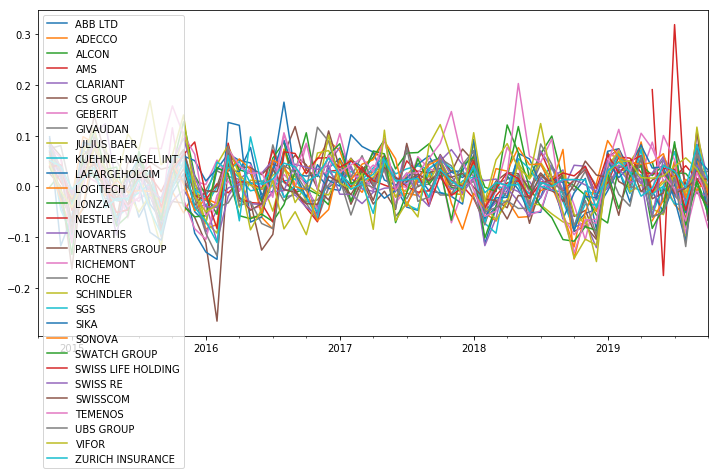

In [48]:
df_change.plot(figsize = (12,6))

Grafik exportieren geht dann so:

In [49]:
import matplotlib.pyplot as plt 
plt.savefig("export.pdf")

<Figure size 432x288 with 0 Axes>

Alle, die ein Schwankung von über 1 Prozent haben von Monat zu Monat

In [30]:
df_volatil = df_change[df_change >= 0.01]
df_volatil.head(5)

,ABB LTD,ADECCO,ALCON,AMS,CLARIANT,CS GROUP,GEBERIT,GIVAUDAN,JULIUS BAER,KUEHNE+NAGEL INT,...,SIKA,SONOVA,SWATCH GROUP,SWISS LIFE HOLDING,SWISS RE,SWISSCOM,TEMENOS,UBS GROUP,VIFOR,ZURICH INSURANCE
2014-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-01,0.079790,0.051791,NaN,NaN,0.094140,0.025495,0.081492,0.075084,0.080326,0.062344,...,0.098170,0.041314,0.037756,0.038569,0.088017,0.067340,0.026442,0.078780,0.045474,0.051272
2014-12-01,NaN,0.037751,NaN,NaN,NaN,NaN,0.019194,0.080518,0.038228,0.038386,...,NaN,NaN,NaN,0.042470,0.034218,NaN,0.030136,0.027761,NaN,0.039829
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-01,0.052712,0.098208,NaN,NaN,0.073157,0.027777,NaN,0.023634,0.075744,0.043652,...,0.087627,NaN,0.055288,0.015641,0.038808,0.029747,0.036678,0.032424,0.010278,0.014329


Oder kann man berechnen, wie gross die Schwankungen in absoluten Zahlen sind?

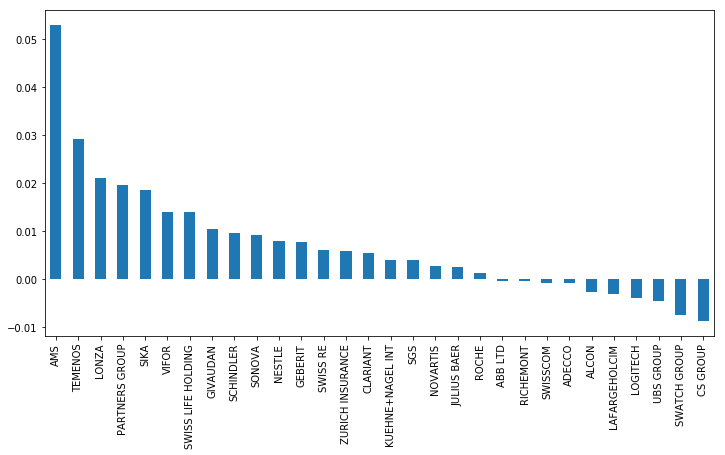

In [36]:
df_change.mean().sort_values(ascending = False).plot(figsize = (12,6),kind = 'bar')

Da ist die Aussagekraft beschränkt. Es ist einfach der Durchschnitt der Veränderungen zum Vormonat.   
Was ergibt das mit median?

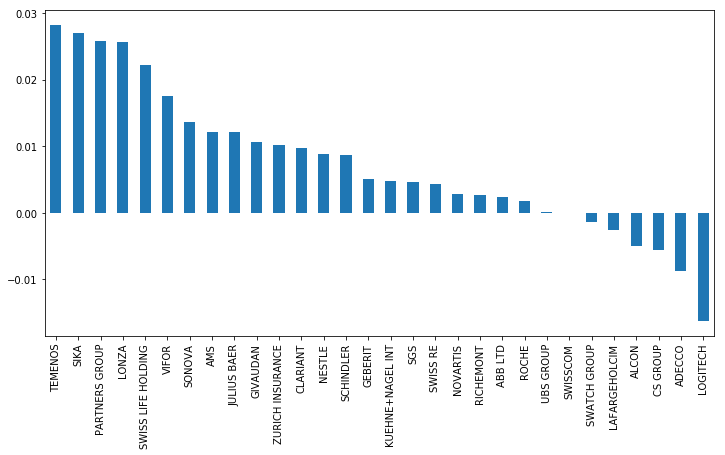

In [37]:
df_change.median().sort_values(ascending = False).plot(figsize = (12,6),kind = 'bar')

In [39]:
df_volatil = df_change[(df_change>=0.05)|(df_change<=-0.05)]
df_volatil

,ABB LTD,ADECCO,ALCON,AMS,CLARIANT,CS GROUP,GEBERIT,GIVAUDAN,JULIUS BAER,KUEHNE+NAGEL INT,...,SIKA,SONOVA,SWATCH GROUP,SWISS LIFE HOLDING,SWISS RE,SWISSCOM,TEMENOS,UBS GROUP,VIFOR,ZURICH INSURANCE
2014-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-01,0.079790,0.051791,NaN,NaN,0.094140,NaN,0.081492,0.075084,0.080326,0.062344,...,0.098170,NaN,NaN,NaN,0.088017,0.067340,NaN,0.078780,NaN,0.051272
2014-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.080518,NaN,NaN,...,-0.117172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,-0.108811,NaN,NaN,NaN,-0.088626,-0.162785,NaN,NaN,-0.092450,NaN,...,-0.059087,-0.086786,-0.134472,NaN,NaN,-0.064319,-0.111726,-0.091601,NaN,NaN
2015-02-01,0.052712,0.098208,NaN,NaN,0.073157,NaN,NaN,NaN,0.075744,NaN,...,0.087627,NaN,0.055288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-01,NaN,NaN,NaN,-0.175920,NaN,-0.052869,NaN,0.053499,-0.055610,NaN,...,NaN,0.064574,NaN,NaN,0.054929,NaN,NaN,-0.051824,NaN,NaN
2019-07-01,NaN,NaN,NaN,0.319397,NaN,NaN,NaN,NaN,NaN,0.068661,...,NaN,NaN,0.088162,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,NaN,-0.060303,NaN,NaN,-0.080427,-0.074018,NaN,NaN,-0.104158,NaN,...,-0.108295,NaN,-0.075969,NaN,NaN,NaN,-0.068187,-0.118676,0.05643,NaN
2019-09-01,0.083069,0.066367,NaN,NaN,0.104760,0.110165,0.067088,0.060302,0.117079,NaN,...,0.054655,NaN,NaN,NaN,NaN,NaN,NaN,0.071633,NaN,0.081731


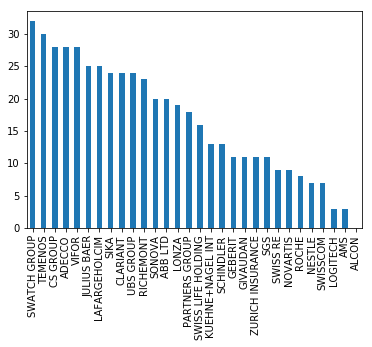

In [40]:
df_volatil.count().sort_values(ascending=False).plot(kind="bar")

Frage: verwässert der Trigger von 5 Prozent das Resultat?  
Oder wie könnte man das mit der Standardabweichung rechnen. Sieger ist die Firma mit den geringsten Schwankungen?

## Die Story
Wählen Sie eine ihrer Fragen aus, die Sie bearbeitet haben.
- Drei bis vier Sätze, welche die Story zusammenfassen
- eine oder mehrere Grafiken, die das Ergebnis illustrieren